<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries : 

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Q1_A :

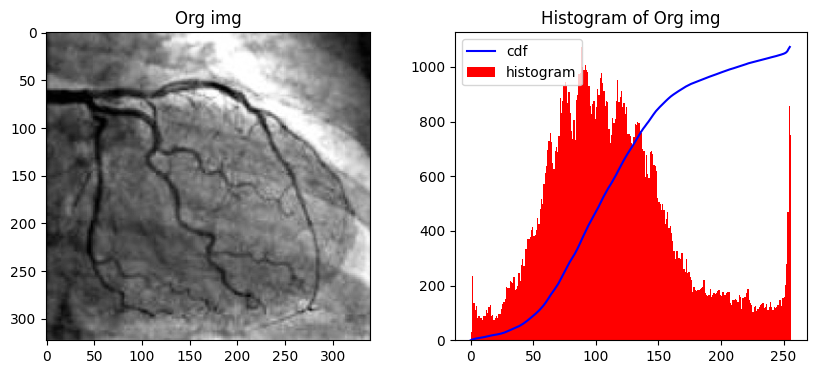

In [64]:
#Read image
img = cv2.imread("drive/MyDrive/DIP_EXC2/Q1/Q1_img.jpg", 0)

#Calcute hist and cdf
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#Show histogram & image
f, subplt = plt.subplots(1,2, figsize=(10,4))

subplt[0].imshow(img, cmap="gray")
subplt[0].set_title("Org img")
subplt[1].plot(cdf_normalized, color = 'b')
subplt[1].hist(img.flatten(),256,[0,256], color = 'r')
subplt[1].legend(('cdf','histogram'), loc = 'upper left')
subplt[1].set_title("Histogram of Org img")
plt.show()

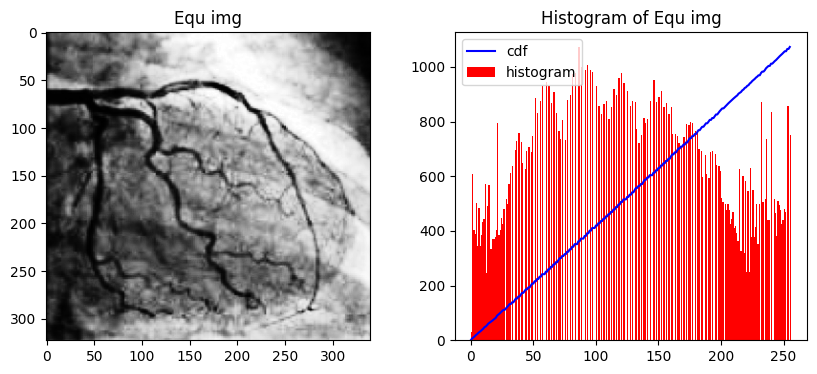

In [70]:
#define a & b
a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)

height,width=img.shape

#calcute histogram
for i in range(width):
    for j in range(height):
        g = img[j,i]
        a[g] = a[g]+1


#histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,),dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp;
    b[i] = round(b[i] * 255);

#b now contains the equalized histogram
b=b.astype(np.uint8)

#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = img[j,i]
        img[j,i]= b[g]

equ_img = img  

#Calcute hist and cdf
hist,bins = np.histogram(equ_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#Show histogram & image
f, subplt = plt.subplots(1,2, figsize=(10,4))

subplt[0].imshow(equ_img, cmap="gray")
subplt[0].set_title("Equ img")
subplt[1].plot(cdf_normalized, color = 'b')
subplt[1].hist(equ_img.flatten(),256,[0,256], color = 'r')
subplt[1].legend(('cdf','histogram'), loc = 'upper left')
subplt[1].set_title("Histogram of Equ img")
plt.show()

#save image
cv2.imwrite("drive/MyDrive/DIP_EXC2/Q1/equManually_img.jpg", equ_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Q1_B :

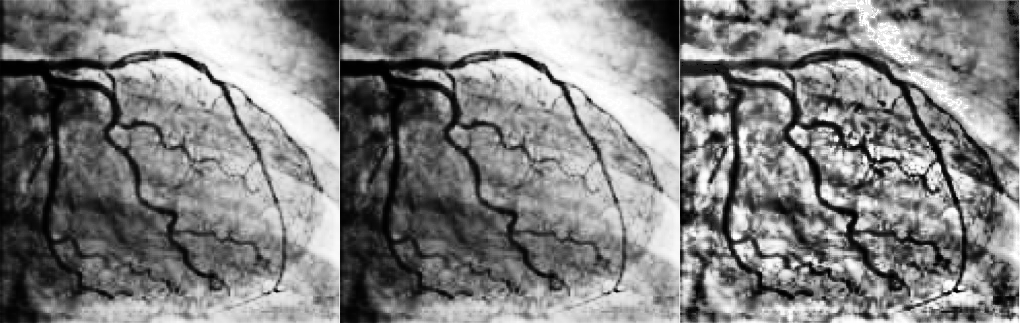

        (a)equalizeManually                             (b)equalizeHist                        (c)createCLAHE


In [69]:
#Histogram Equalization
equ = cv2.equalizeHist(img)

#Create a CLAHE
clahe = cv2.createCLAHE(clipLimit=30, tileGridSize=(8,8))
cl = clahe.apply(img)

#Show image
horizontal_concat = np.concatenate((equ_img, equ, cl), axis=1)
cv2_imshow(horizontal_concat)

#Save image
cv2.imwrite("drive/MyDrive/DIP_EXC2/Q1/equ_img.jpg", equ)
cv2.imwrite("drive/MyDrive/DIP_EXC2/Q1/clahe_img.jpg", cl)
cv2.imwrite("drive/MyDrive/DIP_EXC2/Q1/equVSclahe.jpg", horizontal_concat)
print("        (a)equalizeManually                             (b)equalizeHist                        (c)createCLAHE")

cv2.waitKey(0)
cv2.destroyAllWindows()